# 🧬 AMES Mutagenicity Prediction

## 📖 Dataset Description
Mutagenicity refers to the ability of a drug to induce genetic alterations. Drugs that damage DNA may lead to cell death or other severe adverse effects.

The **AMES test**, developed by Professor Bruce Ames, is a widely used biological assay to assess mutagenicity. It is a short-term bacterial reverse mutation assay that detects many compounds that can cause genetic damage or frameshift mutations.

The **AMES dataset** used here is aggregated from four scientific studies.

- **Task Type**: Binary classification  
- **Input**: SMILES string of a drug molecule  
- **Output**: `1` (mutagenic) or `0` (not mutagenic)  
- **Size**: 7,255 compounds

## 📚 References
Xu, Congying, et al. “In silico prediction of chemical Ames mutagenicity.” Journal of chemical information and modeling 52.11 (2012): 2840-2847.

**License**: CC BY 4.0

## 📦 Imports

In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import pandas as pd
from scripts.tdc_dataset_download import TDCDatasetDownloader
from scripts.eda_utils import DatasetLoader, EDAVisualizer, SMARTSPatternAnalyzer


______

## 📥 Download AMES Dataset

In [2]:
# Declare category and dataset
category = 'tox'
dataset = 'AMES'

In [3]:
# Initiate downloader class to download the dataset
downloader = TDCDatasetDownloader(category, dataset)

Downloading...
100%|██████████| 344k/344k [00:00<00:00, 545kiB/s] 
Loading...
Done!


✅ Dataset 'AMES' saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/AMES.csv'
✅ train split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/train.csv'
✅ valid split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/valid.csv'
✅ test split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/AMES/splits/test.csv'


________

## 📊 Exploratory Data Analysis

In this section, we analyze the AMES mutagenicity dataset to better understand its structure, balance, and molecular content. Exploratory Data Analysis (EDA) helps us uncover patterns, detect anomalies, and gain insights that will guide our preprocessing and modeling steps.

### 1. Load Datasets ###

In [4]:
######################################## Initialize the dataset loader ######################################## 
loader = DatasetLoader(dataset_name=dataset)

In [5]:
######################################## Load datasets ######################################## 
main_df, train_df, valid_df, test_df = loader.load_all()

🧬 AMES_main  ➡️ (7278, 3)
⚗️ AMES_train ➡️ (5094, 3)
🔬 AMES_valid ➡️ (728, 3)
🧪 AMES_test  ➡️ (1456, 3)


______

### 2. 📦 Dataset Overview ###

Before diving into the analysis, it’s essential to understand the structure of the datasets we’re working with — including the main dataset and the train/validation/test splits.

The function `EDAVisualizer.show_dataset_info()` provides a concise summary of:
- Shape (rows × columns)
- Column names
- Missing values
- Sample preview (via `.head()`)

You can run this by:
```python
EDAVisualizer.show_dataset_info(loader)

```
Alternatively, for specific splits only e.g for just Train and Test Data:
```python
selected_datasets = ['train','test']
EDAVisualizer.show_dataset_info(loader, dataset_names=selected_datasets)



In [6]:
######################################## Show Dataset Info  ########################################

EDAVisualizer.show_dataset_info(loader)

🧬 AMES_main Info
----------------------------------------
Shape: (7278, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 0,O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...,1
1,Drug 1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1
2,Drug 2,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0
3,Drug 3,[N-]=[N+]=CC(=O)NCC(=O)NN,1
4,Drug 4,[N-]=[N+]=C1C=NC(=O)NC1=O,1




⚗️ AMES_train Info
----------------------------------------
Shape: (5094, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1
1,Drug 2,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0
2,Drug 3,[N-]=[N+]=CC(=O)NCC(=O)NN,1
3,Drug 4,[N-]=[N+]=C1C=NC(=O)NC1=O,1
4,Drug 6,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1




🔬 AMES_valid Info
----------------------------------------
Shape: (728, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 4852,C=C(C)C(=O)OCC(O)COc1ccc(C(C)(C)c2ccc(OCC(O)CO...,0
1,Drug 4411,Cc1c2cc(CO)ccc2nc2c1ccc1ccccc12,1
2,Drug 2192,CC(=O)NNc1ccccc1,1
3,Drug 5800,CN(C)CCCN,0
4,Drug 3586,Cc1cc([N+](=O)[O-])ccc1N,1




🧪 AMES_test Info
----------------------------------------
Shape: (1456, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Drug 6060,Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3,1
1,Drug 6703,CN(CC(O)CO)N=O,1
2,Drug 6827,O=[N+]([O-])c1ccc(OC2CO2)cc1,1
3,Drug 3689,Cn1cnc2cc([N+](=O)[O-])ccc21,0
4,Drug 4516,CC[C@H](CO)NCCN[C@H](CC)CO,0


-----

### 3. 💎 Unique SMILES Analysis ###

Knowing how many unique compounds exist in each dataset helps:
- Measure diversity
- Avoid duplication bias
- Confirm splits are stratified

Run:
```python
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)


In [8]:
######################################## Check Unique  Drug  Count in each dataset  ########################################
print(f"Number of Unique drug count in {dataset} train data is: =====>> {train_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} validation data is: =====>> {valid_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} test data is: =====>> {test_df["Drug"].nunique()}\n")
print(f"Total number of Unique drug count in {dataset} data is: =====>> {main_df["Drug"].nunique()}\n")

Number of Unique drug count in AMES train data is: =====>> 5084

Number of Unique drug count in AMES validation data is: =====>> 726

Number of Unique drug count in AMES test data is: =====>> 1454

Total number of Unique drug count in AMES data is: =====>> 7255



Unique SMILES counts per dataset:
Train: 5084
Valid: 726
Test: 1454


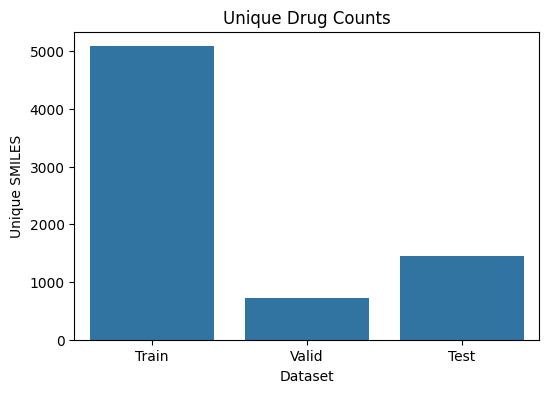

In [9]:
######################################## Compare Unique  Drug  Count Distribution  ########################################
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)

_____

### 4. 🧮  Target Class Distribution in dataset ###

Class imbalance is a common challenge in classification tasks. Plotting the distribution of the target labels helps us understand:
- Whether the dataset is balanced
- The dominant class (if any)
- The need for resampling or weighted loss functions

We use:
```python
EDAVisualizer.plot_label_distribution(df)


🧮 Class Counts:
Y
1    3974
0    3304
Name: count, dtype: int64

📊 Class Percentages:
Y
1    54.6
0    45.4
Name: proportion, dtype: float64


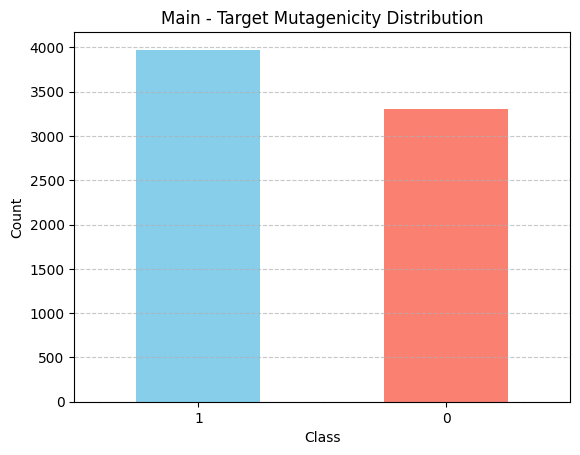

In [10]:
########################################  Plot class distribution on Main Dataset ######################################## 
EDAVisualizer.plot_label_distribution(main_df, target_col='Y', title='Main - Target Mutagenicity Distribution')

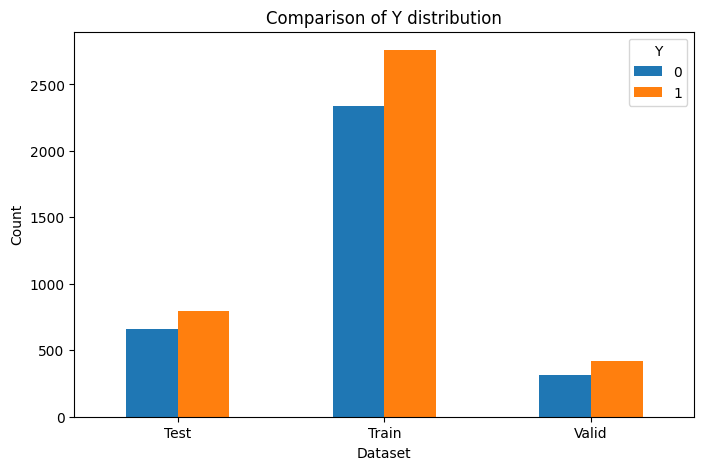


Label distribution percentages:
Y            0      1
Dataset              
Test     45.19  54.81
Train    45.84  54.16
Valid    42.72  57.28


In [11]:
########################################  Plot class distribution Comparison between Split Dataset ######################################## 
EDAVisualizer.compare_label_distributions(
    dfs=[train_df, valid_df, test_df], 
    df_names=['Train', 'Valid', 'Test'], 
    target_col='Y'
)

______

### 5. 📏 SMILES Length Analysis ###

SMILES strings vary in length depending on the molecular complexity. Analyzing their length:
- Highlights outliers or unusually long/short molecules
- Informs sequence-based model designs (like RNNs, Transformers)

To analyze the distribution:
```python
EDAVisualizer.check_smiles_length(loader=loader)


📏 SMILES Length Stats for Main:


count    7278.000000
mean       30.433773
std        15.943264
min         3.000000
25%        19.000000
50%        28.000000
75%        38.000000
max       175.000000
Name: smiles_length, dtype: float64

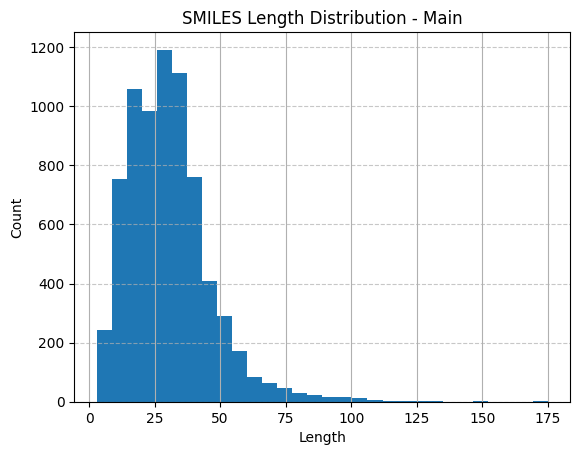

In [12]:
########################################  Check the SMILES Length Distribution of the Full Dataset ######################################## 
EDAVisualizer.check_smiles_length(loader=loader)

📏 SMILES Length Stats for Test:


count    1456.000000
mean       30.170330
std        15.305318
min         3.000000
25%        19.000000
50%        29.000000
75%        38.000000
max       107.000000
Name: smiles_length, dtype: float64

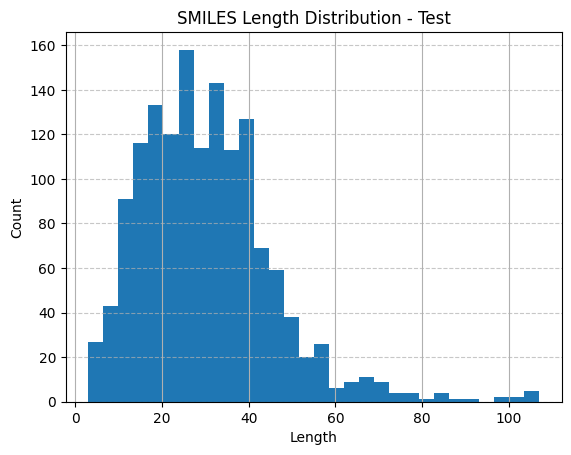

In [13]:
########################################  Alternatively, Check the SMILES Length Distribution of the Selected/Multiple Dataset Splits ######################################## 
EDAVisualizer.check_smiles_length(dfs=[test_df], names=["Test"])


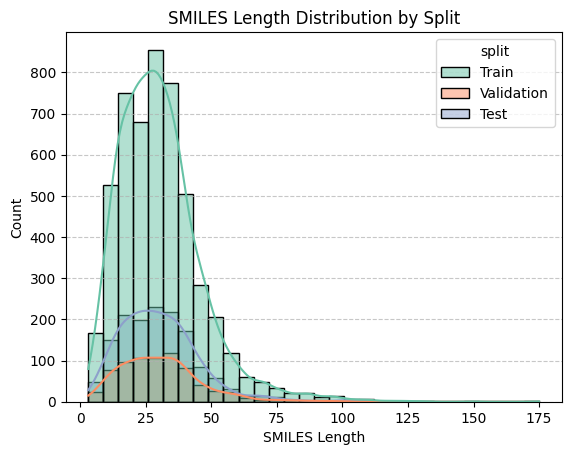

In [14]:
########################################  Compare the SMILES Length Distribution between Split Dataset ######################################## 

EDAVisualizer.compare_smiles_length(loader=loader)

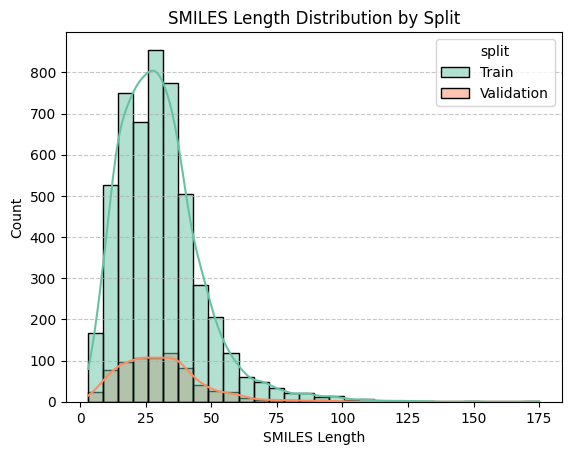

In [15]:
######################################## Alternatively, we can compare selected splits dataset by executing below ######################################## 

selected_dfs = [train_df, valid_df]
dataset_names=['Train', 'Validation']


EDAVisualizer.compare_smiles_length(selected_dfs, dataset_names)

_____________

### 5. ✔️ RDKit Molecular Validity Check ###

Not all SMILES strings are guaranteed to represent valid molecules. Some may contain syntax errors or rare patterns RDKit cannot parse.

This function evaluates validity by attempting to convert each SMILES to an RDKit Mol object:
```python
EDAVisualizer.check_molecular_validity(loader=loader)


You can also pass a different column name if your SMILES column isn’t named Drug e.g:

EDAVisualizer.check_molecular_validity(train_df, smiles_col='SMILES')

In [16]:
######################################## Check Drug Molecular Validity ######################################## 

EDAVisualizer.check_molecular_validity(loader=loader)

🧪 Validity for Main:
is_valid_mol
True    7278
Name: count, dtype: int64
❗ Invalid molecules in Main: 0.00%

🧪 Validity for Train:
is_valid_mol
True    5094
Name: count, dtype: int64
❗ Invalid molecules in Train: 0.00%

🧪 Validity for Validation:
is_valid_mol
True    728
Name: count, dtype: int64
❗ Invalid molecules in Validation: 0.00%

🧪 Validity for Test:
is_valid_mol
True    1456
Name: count, dtype: int64
❗ Invalid molecules in Test: 0.00%



____________

### 6. 🧬 Molecular Descriptor Engineering ###
Use RDKit to calculate standard drug-likeness properties.

This function computes key cheminformatics descriptors from SMILES using RDKit:
- Molecular weight (MW)
- LogP (lipophilicity)
- Topological Polar Surface Area (TPSA)
- Hydrogen Bond Donors/Acceptors (HBD/HBA)
- Rotatable bonds
- Ring counts (total and aromatic)

You can add descriptors to a dataset via:
```python
EDAVisualizer.add_molecular_descriptors(loader=loader)

```
You can also:

🔹 Apply to Specific DataFrames:

```python
EDAVisualizer.add_molecular_descriptors(dfs=[train_df, test_df], names=["Train", "Test"])
```

🔹 Apply to a single DataFrame:

```python
EDAVisualizer.add_molecular_descriptors(dfs=valid_df, names=["Validation"])
```

🔹 Return new DataFrames:

```python
updated = EDAVisualizer.add_molecular_descriptors(dfs=[train_df], inplace=False)

In [27]:
######################################## Add Molecular Descriptors ######################################## 
EDAVisualizer.add_molecular_descriptors(loader=loader)


🧪 Adding molecular descriptors to: Main
🧪 Adding molecular descriptors to: Train
🧪 Adding molecular descriptors to: Validation
🧪 Adding molecular descriptors to: Test


_____

### 7. ✨ SMARTS Pattern Matching ###

SMARTS patterns represent functional groups (e.g., nitro groups, amines, halogens). This module detects presence of such substructures and summarizes their occurrence by class.

**Steps**:
1. Use `SMARTSPatternAnalyzer().analyze(df)` to add SMARTS flags.
2. Use `.summarize_patterns(df)` to compare frequency by label.

Example:
```python
smarts_analyzer = SMARTSPatternAnalyzer()
train_df = smarts_analyzer.analyze(train_df)
smarts_analyzer.summarize_patterns(train_df)


In [ ]:
######################################## Initialize SMARTS Pattern Analyzer ######################################## 
analyzer = SMARTSPatternAnalyzer()

In [ ]:
######################################## Detect SMARTS Substructures in Main Dataset ######################################## 

data_with_flags = analyzer.analyze(main_df)

🔍 SMARTS Substructure Presence by Class



,Class 0,Class 1
smarts_Aromatic Ring,2083,2917
smarts_Hydroxyl Group,1361,1203
smarts_Halogen,688,775
smarts_Alkene,621,638
smarts_Aromatic Amine,604,911
smarts_Carboxylic Acid,416,191
smarts_Sulfonamide,61,22
smarts_Alkyne,21,8
smarts_Nitro Group,0,0


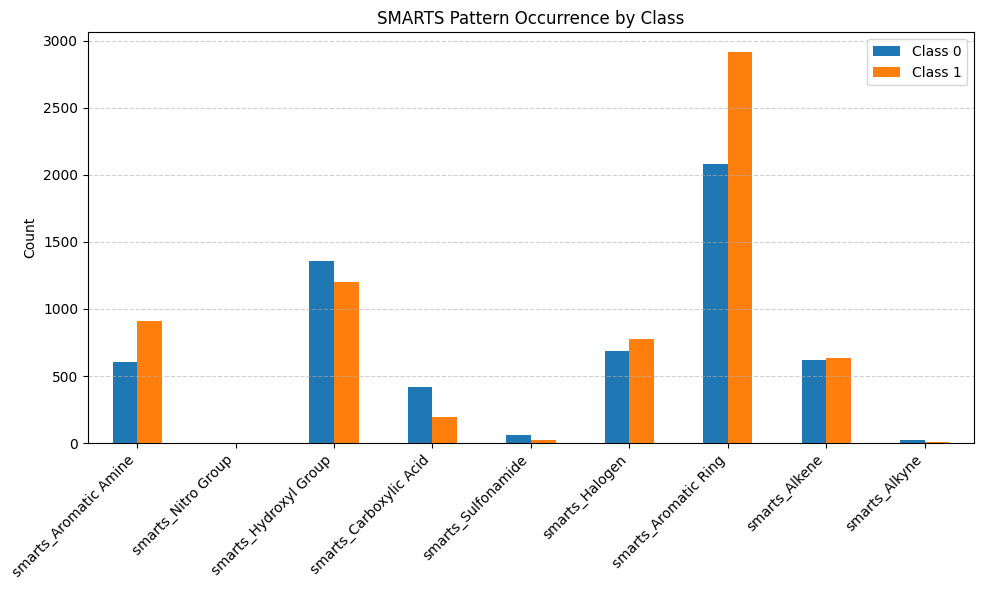

In [ ]:
########################################  Analyze SMARTS Substructures ######################################## 

analyzer.summarize_patterns(data_with_flags)

__________

### 8. 📈 Visualize correlation between features  ###

### Feature Correlation Heatmaps

Correlation matrices help identify:
- Redundant features
- Feature interactions
- Potential for multicollinearity

We visualize correlations for numeric descriptors:
```python
EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)
```

You can also visualize for multiple dataset by:
```python
EDAVisualizer.compare_correlation_heatmaps(
    dfs=[train_df, valid_df, test_df],
    df_names=["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings']
)


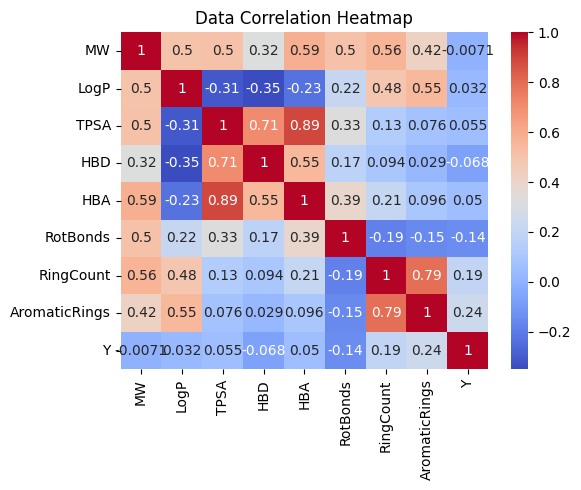

In [ ]:
######################################## Show Correlation Heatmaps for Molecular Descriptors ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)


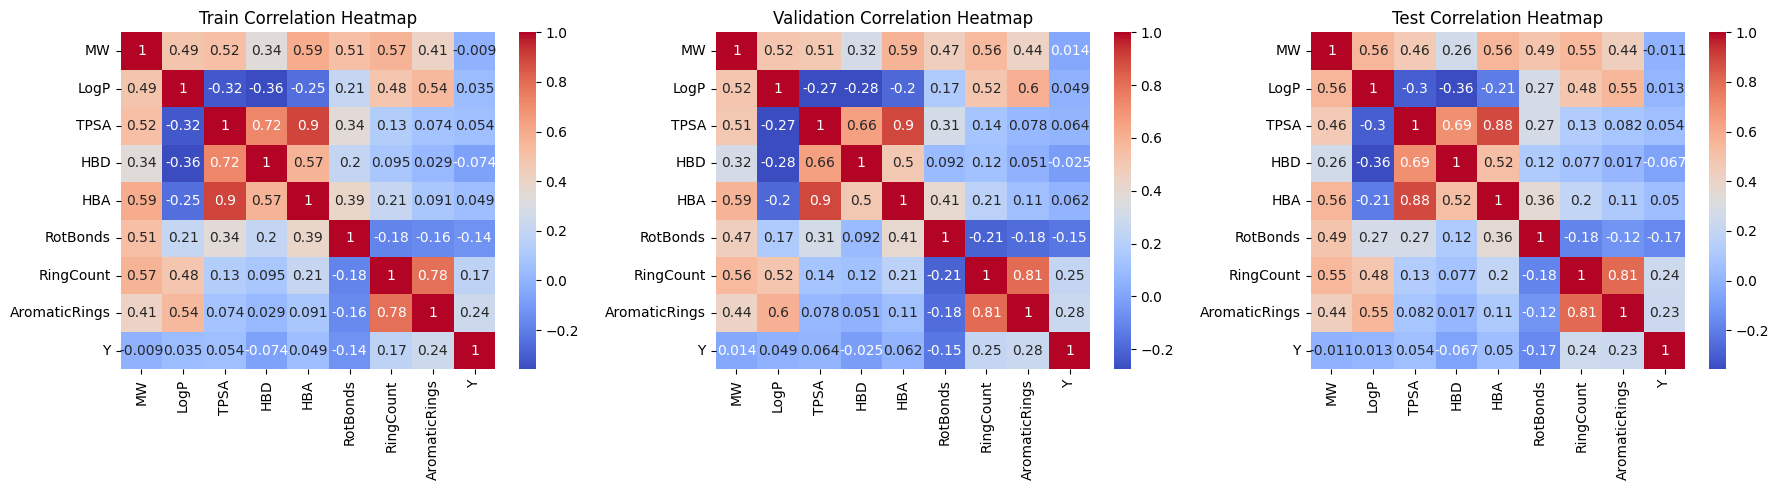

In [46]:
######################################## Check Correlation Heatmaps across Splits ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)

### Boxplot of Numeric Features Across Splits

Boxplots give another visual cue on median, spread, and outliers per descriptor.

Use:
```python
EDAVisualizer.compare_boxplots(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Validation', 'Test'],
    col='MW'
)


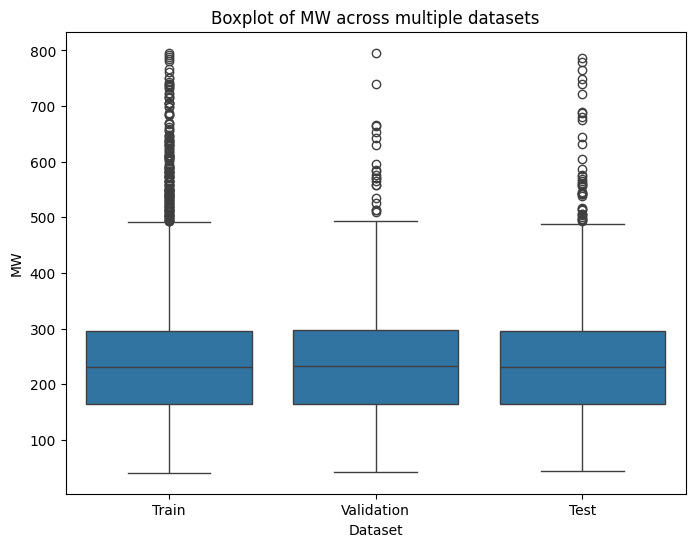

In [45]:
######################################## Compare MW Boxplots ######################################## 

EDAVisualizer.compare_boxplots(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='MW'
)

### Compare Feature Distributions (Histogram)

Distribution shifts between train/test datasets can impact model generalization. Here, we compare numeric descriptor histograms.

Example:
```python
EDAVisualizer.compare_numeric_distribution(
    dfs=[train_df, test_df],
    df_names=['Train', 'Test'],
    col='MW'  # or LogP, TPSA, etc.
)


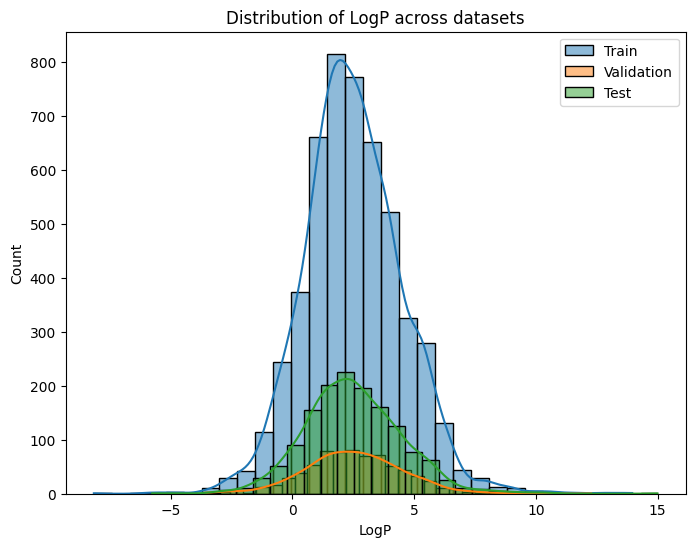

In [44]:
######################################## xxxxx ######################################## 

EDAVisualizer.compare_numeric_distribution(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='LogP'
)

_____________

### 9. 🔍 Visual Inspection of Molecules ###

Before building models, it’s helpful to get a “chemical feel” for the data by visualizing molecules per class.

This function:
- Randomly samples `n` molecules per class
- Converts them to RDKit molecules
- Displays them with grid labels

Usage:
```python
EDAVisualizer.draw_samples_by_class(main_df, n=4)



🧪 5 molecules for class 1


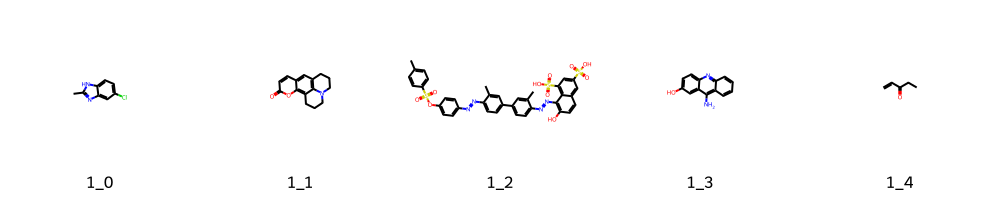

🧪 5 molecules for class 0


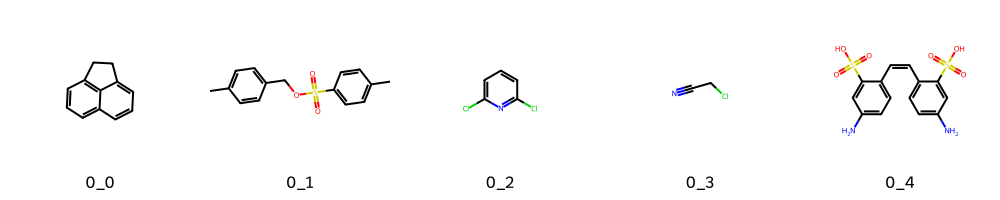

In [24]:
######################################## Visualize "n" samples of molecules per class ########################################
EDAVisualizer.draw_samples_by_class(main_df, n=5)

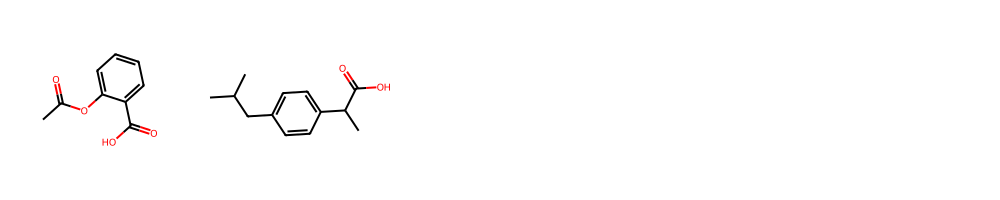

In [26]:
######################################## Draw Sample DRUG SMILE ########################################

EDAVisualizer.draw_molecules([
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # Ibuprofen
])

________